<div style="line-height: 0.4;">
    <h1 style="color: green; font-weight: bold; text-align: center;"></h1>
    <h1 style="color: green; font-weight: bold; text-align: center;">PRELIMINARES</h1>
    <h3 style="color: darkolivegreen; font-weight: bold; text-align: center;">CURSO 4 (PROCESOS ESTOCÁSTICOS 2)</h3>
    <h5 style="color: darkolivegreen; font-weight: bold; text-align: center;">PARTE 2 / LECCIÓN 1</h5>
</div>

<h4 style="color: green; font-weight: bold; text-align: left;">Ejercicio 1</h4>

<h3>Cálculo de la Función de Renovación Λ(t)</h3> 

Calculamos la función de renovación $\Lambda(t)$ para un proceso de Poisson, utilizando la propiedad de que la función de renovación es lineal en $t$ para este caso específico.

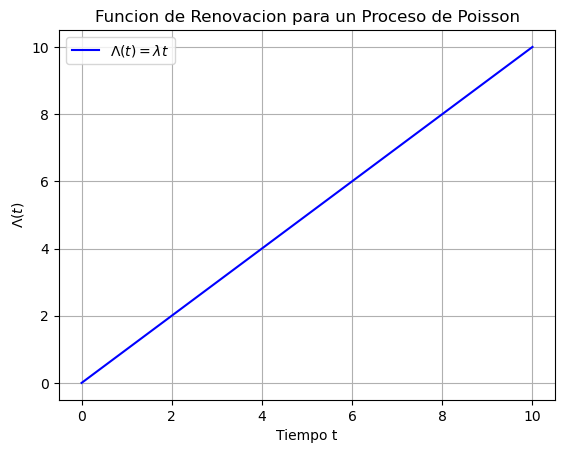

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parametros
lambda_rate = 1  # Tasa del proceso Poisson
t_max = 10  # Tiempo maximo

# Funcion de renovacion para un proceso de Poisson
def lambda_poisson(t, lambda_rate):
    return lambda_rate * t

# Calcular y graficar la funcion de renovacion
t_values = np.linspace(0, t_max, 100)
lambda_values = lambda_poisson(t_values, lambda_rate)

# Graficar la funcion de renovacion
plt.plot(t_values, lambda_values, label=r'$\Lambda(t) = \lambda t$', color='b')
plt.xlabel('Tiempo t')
plt.ylabel(r'$\Lambda(t)$')
plt.title('Funcion de Renovacion para un Proceso de Poisson')
plt.grid(True)
plt.legend()
plt.show()

<h4 style="color: green; font-weight: bold; text-align: left;">Ejercicio 2</h4>

<h3>Simulación de la Ecuación Integral de Renovación</h3> 

Simularemos la ecuación integral de renovación para un proceso donde los tiempos de vida siguen una distribución exponencial, usando la propiedad $\Lambda(t) = F(t) + \int_0^t \Lambda(t - s) \, dF(s).$

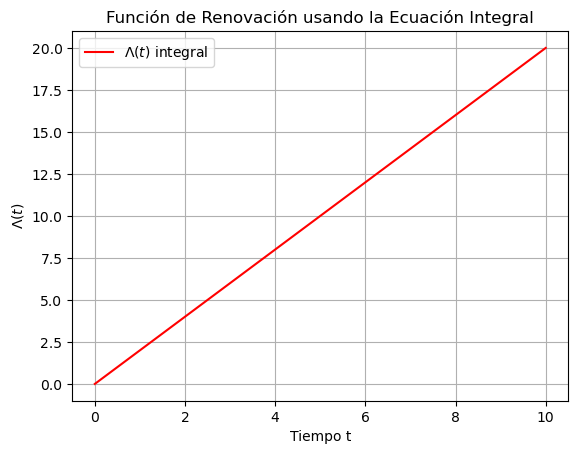

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
lambda_rate = 1  # Tasa de la distribución exponencial
t_max = 10  # Tiempo máximo

# Función para calcular la integral de renovación de manera iterativa
def lambda_integral(t, lambda_rate):
    F_t = 1 - np.exp(-lambda_rate * t)
    
    # Realizamos la integración numérica de manera iterativa
    s_values = np.linspace(0, t, 100)  # Los valores para la variable de integración
    integrand = [(1 + (1 - np.exp(-lambda_rate * (t - s))) if t - s >= 0 else 0) for s in s_values]
    integral = np.trapz(integrand, s_values)  # Usamos trapz para la integración numérica
    return F_t + integral

# Calcular y graficar la función de renovación
t_values = np.linspace(0, t_max, 100)
lambda_values = []

# Calcular la función de renovación para cada valor de t
for t in t_values:
    lambda_values.append(lambda_integral(t, lambda_rate))

# Graficar la función de renovación
plt.plot(t_values, lambda_values, label=r'$\Lambda(t)$ integral', color='r')
plt.xlabel('Tiempo t')
plt.ylabel(r'$\Lambda(t)$')
plt.title('Función de Renovación usando la Ecuación Integral')
plt.grid(True)
plt.legend()
plt.show()


<h4 style="color: green; font-weight: bold; text-align: left;">Ejercicio 3</h4>

<h3>Cálculo de la Probabilidad P(Nt = n)</h3> 

Calculamos la probabilidad $P(N_t = n)$, donde $N_t$ es el número de renovaciones hasta el tiempo $t$. Esta probabilidad se puede obtener usando la distribución de Poisson para el número de eventos.

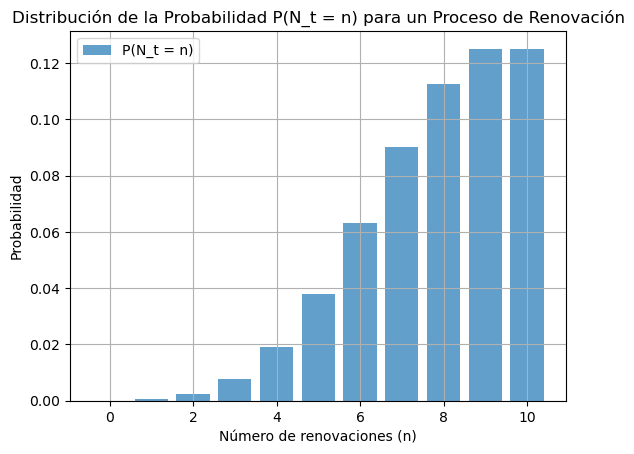

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# Parámetros
lambda_rate = 1  # Tasa del proceso Poisson
t_max = 10  # Tiempo máximo

# Calcular la probabilidad de P(N_t = n) usando Poisson
n_max = 10  # Número máximo de renovaciones
n_values = np.arange(0, n_max + 1)
probabilidades = poisson.pmf(n_values, lambda_rate * t_max)

# Graficar la probabilidad P(N_t = n)
plt.bar(n_values, probabilidades, label='P(N_t = n)', alpha=0.7)
plt.xlabel('Número de renovaciones (n)')
plt.ylabel('Probabilidad')
plt.title('Distribución de la Probabilidad P(N_t = n) para un Proceso de Renovación')
plt.grid(True)
plt.legend()
plt.show()